In [78]:
#Import neccessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import random
import seaborn as sns
from bokeh.layouts import gridplot,row
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from mpl_toolkits.mplot3d import Axes3D
from bokeh.plotting import figure, output_notebook, show,output_file
from bokeh.models import HoverTool, BoxSelectTool #For enabling tools
from bokeh.core.properties import value
from bokeh.palettes import brewer

%matplotlib inline
output_notebook()

Loading BokehJS ...

# Dataset is related to an event that hosts different games for public.
# There is a game called 'Bobblehead', we are trying to see impact of this game on the total number of attendees of this game.

In [35]:
#Reading the datasets:
dataset=pd.read_csv("dodgers_training.csv")
dataset.head(5)

,Unnamed: 0,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,58,AUG,20,36878,Monday,Giants,80,1,Night,0,0,0,0
1,62,AUG,25,40284,Saturday,Marlins,70,1,Night,0,0,0,0
2,56,AUG,7,55024,Tuesday,Rockies,80,1,Night,0,0,0,1
3,6,APR,23,26376,Monday,Braves,60,0,Night,0,0,0,0
4,57,AUG,8,37084,Wednesday,Rockies,84,1,Night,0,0,0,0


# (1) Scatter plot using matplotlib:

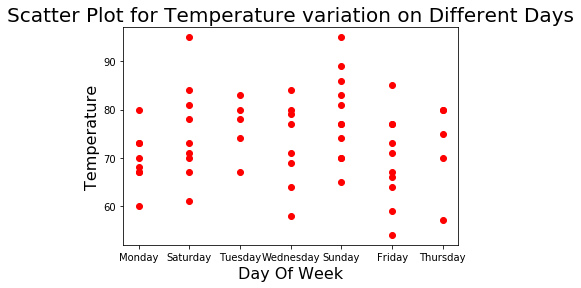

In [36]:
#Extracting required variables from the dataset:
day_of_week=dataset['day_of_week']
temp=dataset['temp']

plt.scatter(day_of_week,temp,c='r',marker='o')
plt.xlabel('Day Of Week', fontsize=16)
plt.ylabel('Temperature', fontsize=16)
plt.title('Scatter Plot for Temperature variation on Different Days',fontsize=20)
plt.rc('figure', figsize = (4, 4))
plt.show()

# (2) Bar graph showing daywise attendance using matplotlib:

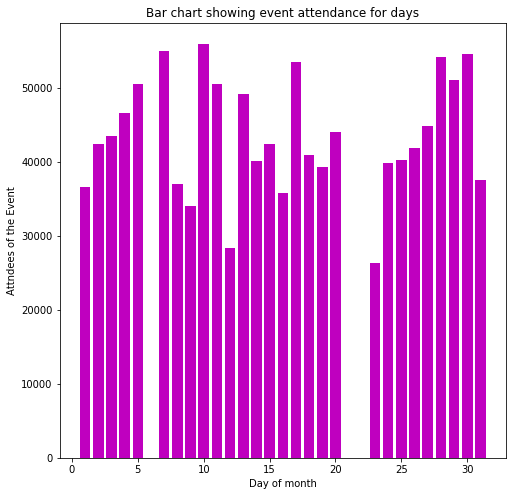

In [57]:
# extracting the data:

day=dataset['day']
attendance=dataset['attend']

# plotting a bar chart 
plt.bar(day, attendance,width = 0.8, color = ['m']) 
  
# naming the x-axis 
plt.xlabel('Day of month') 
# naming the y-axis 
plt.ylabel('Attndees of the Event') 
# plot title 
plt.title('Bar chart showing event attendance for days') 
plt.rc('figure', figsize = (8, 8))
# function to show the plot 
plt.show() 

# (3) Heat map using seaborn representing attendance:

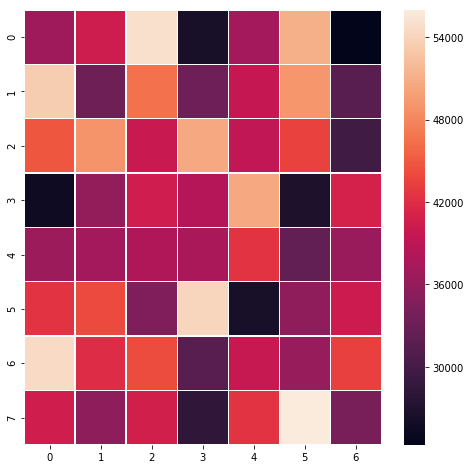

In [58]:
#Converting attendance values into a new matrix:

attendance_reshape=np.asarray(dataset['attend']).reshape(8,7)

uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(attendance_reshape, linewidth=0.5)
plt.show()

# (4) Corelation matrix using seaborn for event variables:

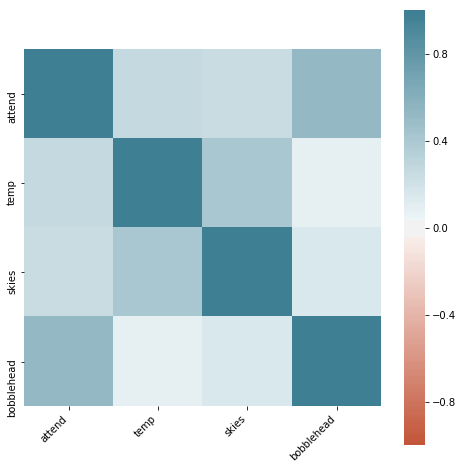

In [59]:
#fetch all required variables to see corelation;


attendance=dataset['attend']
temp=dataset['temp']
skies=dataset['skies']
bobblehead=dataset['bobblehead']


#creat a new dataframe using these variables:
frames1=[attendance,temp,skies,bobblehead]
final=pd.concat(frames1,axis=1)
corr = final.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

# (5) Interactive visualization using bokeh showing daywise attendance:

In [60]:
#extracting data:
day=dataset['day']
attendance=dataset['attend']

s1 = figure(width=450, plot_height=250, title=None)
s1.circle(day, attendance, size=10, color="navy", alpha=0.5)
s1.xaxis.axis_label = 'Days'
s1.yaxis.axis_label = 'Attendance'
t=show(row(s1),notebook_handle=True)

# (6) 3D Scatter plot using matplotlib (For Monday vs Saturday):

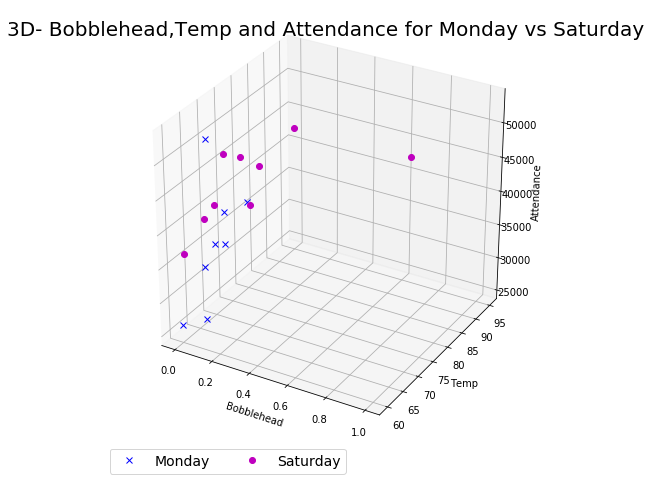

In [61]:
#For monday:
monday_dataset=dataset[dataset.day_of_week == "Monday"]

#For Saturday
satuday_dataset=dataset[dataset.day_of_week == "Saturday"]

#Extracting features:
bobblehead_monday=monday_dataset['bobblehead']
attend_monday=monday_dataset['attend']
temp_monday=monday_dataset['temp']

bobblehead_saturday=satuday_dataset['bobblehead']
attend_saturday=satuday_dataset['attend']
temp_saturday=satuday_dataset['temp']

#create a new plot with a title and axis labels

#Plotting:
colors=['b', 'm']
ax = plt.subplot(111, projection='3d')
ax.plot(bobblehead_monday, temp_monday,attend_monday, 'x', color=colors[0], label='Monday')
ax.plot(bobblehead_saturday, temp_saturday,attend_saturday, 'o', color=colors[1], label='Saturday')
ax.set_xlabel('Bobblehead')
ax.set_ylabel('Temp')
ax.set_zlabel('Attendance')
plt.title('3D- Bobblehead,Temp and Attendance for Monday vs Saturday',fontsize=20)
plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=14, bbox_to_anchor=(0, 0))
plt.rc('figure', figsize = (10, 10))
plt.show()

# (7) Interactive visaulization Temp vs Attendance for Monday vs Saturday using Bokeh with hover effect:

In [74]:
#Add tools
TOOLS = [BoxSelectTool(), HoverTool()]

p = figure(plot_width=400, plot_height=400, tools=TOOLS)
# add square with a size, color, and alpha
p.square(temp_monday,attend_monday, size=20, color="navy")
p.square(temp_saturday, attend_saturday, size=20, color="red")

#Visual Elements
p.xaxis.axis_label = "Temp"
p.yaxis.axis_label = "Attendance"
# show the results
show(p)